# Exercise sheet 9

## A simple particle detector

Consider a fictional particle detector built as a spherical volume of radius $R$. The events (particles) recorded by the detector have the following observables:
- cartesian cordinates of the interaction vertex $(x,y,z)$ referenced to the center of the sphere;
- direction of the particle, represented in the form of direction cosines $(d_x, d_y, d_z)$
- reconstructed energy ($E_{rec}$);
- relative detection time ($t$), for simplicity you can just use a float for this (although you have learned about proper timekeeping in the lecture).

The detector is expected to record background events at a constant rate $r_b$. We want to simulate the detector background according to these (intuitive) properties:
- uniform spatial distribution inside the detector volume;
- uniform direction distribution;
- uniform time distribution;
- the true energy of the background particles ($E_b$) has a normal distribution with given mean $\mu_{E_b}$ and standard deviation $\sigma_{E_b}$;
- due to the limited energy resolution of the detector (that we represent with a parameter $\Delta E_{rec}$), a particle of energy $E_{true}$ will be reconstructed as having energy $E_{rec}$, where $E_{rec}$ follows a normal distribution with mean $E_{true}$ and standard deviation $\Delta E_{rec} \cdot E_{true}$.


### 1. The module
Create a python module `detector.py` providing a class `Detector`.

The class must provide a `generate_background()` method that takes as an argument a duration `T` (livetime) and returns a `numpy` array representing a sample of background events with time between `0` and `T`, having the properties described above. The columns of the array should represent the values introduced before:
- `x`, `y`, `z`, `d_x`, `d_y`, `d_z`, `t`, `E_true`, `E_rec`.

To make your code more tidy, group the properties of the background in a separate class, following this example skeleton code:

### Solution comments
- How to determine the number of events in `generate_background`? For a given livetime `T` the expected number of events is `r_b * T` but the actual number will fluctuate. To be accurate, we need to draw the number of events from a Poisson distribution with mean `r_b * T`.
- How to store the event data? Assuming we have `n_ev` events and `n_obs` attributes, we should create a numpy array of size `(n_ev, n_obs)`. This way we can access the j-th attribute of the i-th event with `arr[i,j]`. However, we need to keep track of which index represents a given property (for example `0` -> `x`). Luckily, numpy supports [structured array](https://numpy.org/doc/stable/user/basics.rec.html) which are very suitable to store tabular data.

In [1]:
# CODE HAS BEEN MOVED TO detector.py

In [2]:
# After you have created your module, you should import the required symbols by activating the following line.
from detector import Detector, BackgroundSource

### TEST PARAMETERS ###
radius = 30.0                   # m
energy_resolution = 0.25

background_rate = 10            # s^{-1}
background_energy_mean  = 1    # MeV
background_energy_sigma = 0.05 # MeV

livetime = 10                # s

### TEST ###
bg = BackgroundSource(r_b = background_rate, mu_Eb = background_energy_mean, sigma_Eb = background_energy_sigma)

det = Detector(R = radius, delta_Erec = energy_resolution, background_source = bg)

background_sample = det.generate_background(livetime)

#print(background_sample)

**Remember**: in most Jupyter installations you have to restart your kernel every time you make a modification to a module in order to run the updated code.

### 2. The script
Provide a script that generates a sample of background events of duration `T` and saves it to a file using the `numpy` builtin functionality. We take this chance to learn the basics of `argparse` to read arguments and options from the command line.

Now take a look at the provided example `generate_events.py` script and modify it to provide the required functionality.

In [3]:
# Try and run this from your terminal, without the starting `!`
!python generate_events.py --background_energy 10.0 --output_file "out.npy" 86400
# At the moment, this script does nothing aside from printing.

Generating 86400.0 s of background events with mean energy 10.0.
Saving data to `out.npy`.


Here `86400` is the value of the `livetime` positional argument, while `--background_energy` and `--output_file` are optional arguments. Check how the two are defined differently in `generate_events.py`.

### Solution notes
The choice of a text file as output format may not be the best, so instead of `numpy.savetxt()` we use `numpy.save()`.

### 3. The benchmark
In Jupyter, load the numpy file produced by your script and produce the following plots:
- one scatter plot $E_{rec}$ vs $E_{true}$;
- one histogram for each of the three spherical coordinates of the interaction vertices: radial distance ($\rho$), zenithal angle ($\theta$) and azimuthal angle ($\phi$). You should calculate these coordinates from $(x, y, z)$. Plot also two additional histograms: one for $\sin(\phi)$ and one for $\cos(\theta)$. Make sure to choose appropriate ranges and number of bins for the histograms, do not leave them as defaults!
- one histogram for each of the three direction cosines $(d_x, d_y, d_z)$;
- one histogram for the distribution of the **time difference between any two consecutive events**. Calculate the mean time difference and mark it on the histogram. (Bonus questions: does this distribution look familiar to you? Does it have some relationship with the input parameters?)

In [4]:
import numpy as np
data = np.load("out.npy")

In [5]:
import matplotlib.pyplot as plt

(0.0, 20.0)

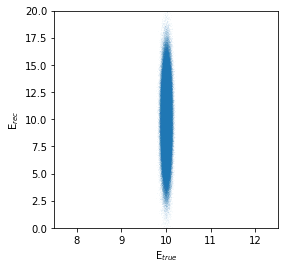

In [6]:
fig, ax = plt.subplots(figsize=(4,4))
# scatterplot with small size and semi-transparent markers
ax.scatter(data["E_true"], data["E_rec"], s=0.01, alpha=0.1)
ax.set_xlabel(r"E$_{true}$")
ax.set_ylabel(r"E$_{rec}$")
ax.set_xlim(7.5,12.5)
ax.set_ylim(0,20)

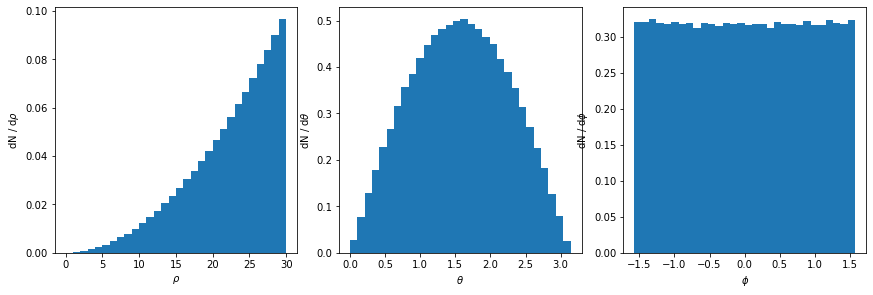

In [7]:
fig, axs = plt.subplots(1,3,figsize=(12,4))
fig.tight_layout()

x, y, z = data['x'], data['y'], data['z']

rho = np.sqrt(x**2 + y**2 + z**2)
theta = np.arctan2(np.hypot(x,y),z)
phi = np.arctan2(y,x)

"""
- although we are not gonna use them, we still define auxiliary variable to "catch" the return values of hist() and set_xxx methods so they do not get printed by Jupyter
- we use density=True when plotting histograms, it is usually a good practice to plot histograms as densities (so the result does not depend on the size of the input sample)
"""

ax = axs[0]

H = ax.hist(rho, bins=30, range=(0,radius), density=True)
_o = ax.set_xlabel(r"$\rho$")
_o = ax.set_ylabel(r"dN / d$\rho$")

ax = axs[1]
H = ax.hist(theta, range=(0.0, np.pi), bins=30, density=True)
_o = ax.set_xlabel(r"$\theta$")
_o = ax.set_ylabel(r"dN / d$\theta$")

ax = axs[2]
H = ax.hist(phi, range=(-np.pi/2, np.pi/2), bins=30, density=True)
_o = ax.set_xlabel(r"$\phi$")
_o = ax.set_ylabel(r"dN / d$\phi$")

The distributions follow the size of the sperical volume element as a function of the three variables.

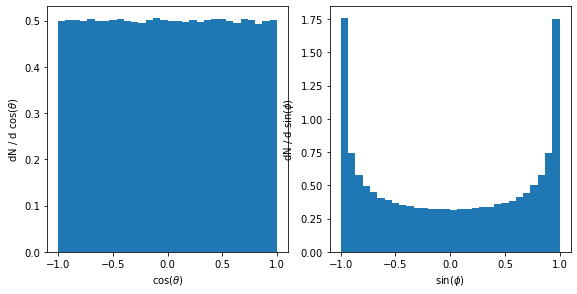

In [8]:
fig, axs = plt.subplots(1,2,figsize=(8,4))
fig.tight_layout()

ax = axs[0]
H = ax.hist(np.cos(theta), range=(-1, 1), bins=30, density=True)
_o = ax.set_xlabel(r"cos($\theta$)")
_o = ax.set_ylabel(r"dN / d cos($\theta$)")

ax = axs[1]
H = ax.hist(np.sin(phi), range=(-1, 1), bins=30, density=True)
_o = ax.set_xlabel(r"sin($\phi$)")
_o = ax.set_ylabel(r"dN / d sin($\phi$)")

With an histogram in $\cos(\theta)$, we find back a uniform distribution. The histogram of $\sin(\phi)$ on the other hand is not very useful.

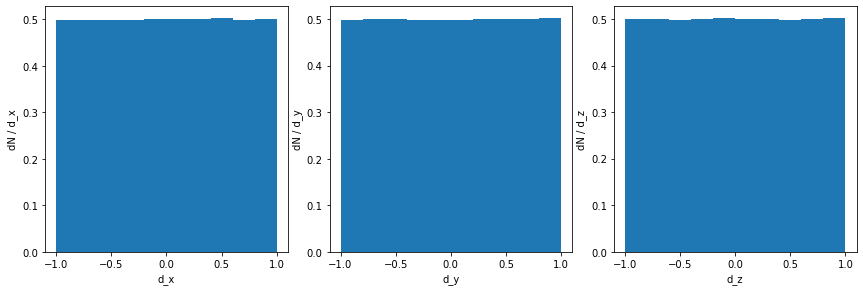

In [9]:
fig, axs = plt.subplots(1,3,figsize=(12,4))
fig.tight_layout()

vars = ['d_x', 'd_y', 'd_z']

"""
Sometimes it is convenient to produce plot with loops, rather than writing the one by one!
"""

for var, ax in zip(vars, axs):
    H = ax.hist(data[var], density=True, range=(-1,1))
    ax.set_xlabel(var)
    ax.set_ylabel(f"dN / {var}")

All as expected!

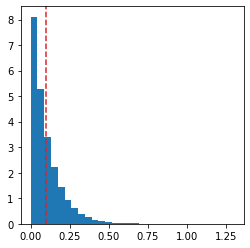

In [10]:
fig, ax = plt.subplots(figsize=(4,4))
dt = data['t'][1:] - data['t'][:-1]
H = ax.hist(dt, bins=30, density=True)
ax.axvline(1/background_rate,linestyle='--', color='tab:red')

The time difference between consecutive events uniformly distributed in time is, in turn, an exponential variable with mean equal to the inverse of the rate!

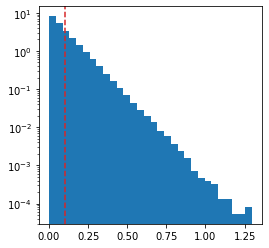

In [11]:
fig, ax = plt.subplots(figsize=(4,4))
dt = data['t'][1:] - data['t'][:-1]
H = ax.hist(dt, bins=30, density=True)
ax.set_yscale('log')
_o = ax.axvline(1/background_rate,linestyle='--', color='tab:red')